# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [85]:
df.dropna(subset = ['AVG_MATH_8_SCORE'], inplace=True)
df.dropna(subset = ['AVG_READING_8_SCORE'], inplace=True)
df.isna().sum()


PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          121
TOTAL_REVENUE                   121
FEDERAL_REVENUE                 121
STATE_REVENUE                   121
LOCAL_REVENUE                   121
TOTAL_EXPENDITURE               121
INSTRUCTION_EXPENDITURE         121
SUPPORT_SERVICES_EXPENDITURE    121
OTHER_EXPENDITURE               121
CAPITAL_OUTLAY_EXPENDITURE      121
GRADES_PK_G                      72
GRADES_KG_G                      70
GRADES_4_G                       70
GRADES_8_G                       70
GRADES_12_G                      70
GRADES_1_8_G                    121
GRADES_9_12_G                    70
GRADES_ALL_G                     70
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               0
INSTRUCTION_PERCENT_OF_TOTAL    121
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: % of Total Expenditure dedicated to Instruction Expenditure

How many years of data are logged in our dataset? 

In [8]:
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [100]:
df["INSTRUCTION_PERCENT_OF_TOTAL"] = df["INSTRUCTION_EXPENDITURE"]/df["TOTAL_EXPENDITURE"] * 100

df.dropna(subset = ['INSTRUCTION_PERCENT_OF_TOTAL'], inplace=True)

states = df.groupby("STATE")


if states.get_group("MICHIGAN")["INSTRUCTION_PERCENT_OF_TOTAL"].mean() > states.get_group("OHIO")["INSTRUCTION_PERCENT_OF_TOTAL"].mean():
    print("Michigan")
else:
    print("Ohio")


PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     2
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
INSTRUCTION_PERCENT_OF_TOTAL    0
dtype: int64
Ohio


Find the average for your outcome score across all states in 2019

In [34]:
years = df.groupby("YEAR")

years.groups.keys()

years.get_group(2019)["INSTRUCTION_PERCENT_OF_TOTAL"].mean()


nan

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [45]:
states = df.groupby("STATE")

for i in states:
    print(i[0], states.get_group(i[0])["INSTRUCTION_PERCENT_OF_TOTAL"].max())

ALABAMA 55.833300047705215
ALASKA 55.675189898053226
ARIZONA 50.31287739713582
ARKANSAS 57.06312886636356
CALIFORNIA 54.360053396917486
COLORADO 50.778042502323906
CONNECTICUT 61.06212192975566
DELAWARE 58.34867498246668
DISTRICT_OF_COLUMBIA 49.94829942952834
DODEA nan
FLORIDA 54.82792004029007
GEORGIA 56.269694203589225
HAWAII 60.478826017145174
IDAHO 56.584518996013564
ILLINOIS 53.89364802947849
INDIANA 50.66323843387877
IOWA 52.694958117268875
KANSAS 54.16417457066991
KENTUCKY 57.22337818467656
LOUISIANA 56.15318302643618
MAINE 61.223319509231786
MARYLAND 56.85375987850322
MASSACHUSETTS 60.184697211797996
MICHIGAN 51.03340089922064
MINNESOTA 53.72613744506035
MISSISSIPPI 56.507662574837916
MISSOURI 52.718454170233834
MONTANA 58.295365517870856
NATIONAL nan
NEBRASKA 59.26543271844521
NEVADA 52.32418181955348
NEW_HAMPSHIRE 57.91525341992316
NEW_JERSEY 57.814192802759955
NEW_MEXICO 50.99553749023195
NEW_YORK 64.45122299024814
NORTH_CAROLINA 56.7348722555566
NORTH_DAKOTA 56.888350321093

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# I already created a feature for my purposes, that being "INSTRUCTION_PERCENT_OF_TOTAL"

Feature engineering justification: I made the "INSTRUCTION_PERCENT_OF_TOTAL" feature since it allows me to gauge the level of spending that a state puts into it's educational program as a proportion of total spending. A state like California which has a considerable budget will obviously spend more than a state like Wyoming which has a far smaller population and thus a far smaller budget.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

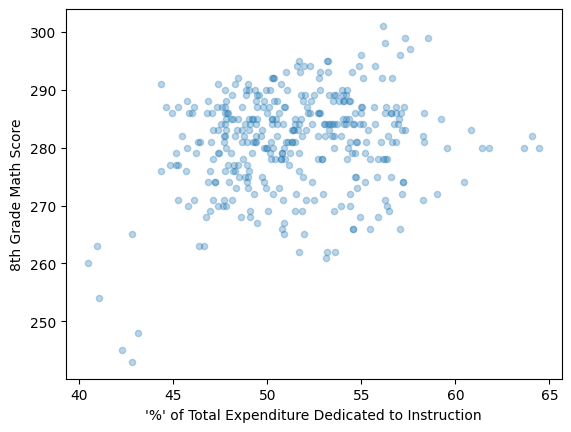

In [93]:
df.plot.scatter(x = "INSTRUCTION_PERCENT_OF_TOTAL", y = "AVG_MATH_8_SCORE", alpha = 0.3)
plt.xlabel("'%' of Total Expenditure Dedicated to Instruction")
plt.ylabel("8th Grade Math Score")

% of Total State Expenditure Dedicated to Instruction versus 8th Grade Math Score

**Visualization 2**

Text(0, 0.5, '8th Grade Reading Score')

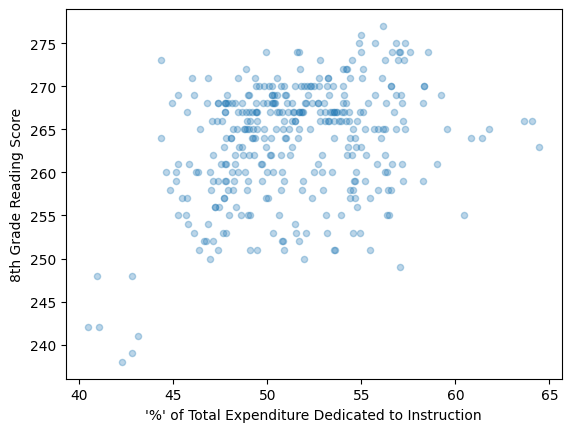

In [94]:
df.plot.scatter(x = "INSTRUCTION_PERCENT_OF_TOTAL", y = "AVG_READING_8_SCORE", alpha = 0.3)
plt.xlabel("'%' of Total Expenditure Dedicated to Instruction")
plt.ylabel("8th Grade Reading Score")

% of Total State Expenditure Dedicated to Instruction versus 8th Grade Reading Score

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [110]:
df = df.reset_index()

from sklearn.model_selection import train_test_split

In [111]:
X = df[["AVG_MATH_8_SCORE", "AVG_READING_8_SCORE"]].dropna()
y = df.loc[X.index]["INSTRUCTION_PERCENT_OF_TOTAL"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
# create your model here
model = LinearRegression()

In [115]:
model.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [120]:
print(model.score(X_test, y_test)) # as we can see the r^2 is miserable, implying that the regression line generated by sklearn may not be a very good fit for the raw data
# This makes sense because my raw data had very little visible correlation in it
np.mean((model.predict(X_test)-y_test)**2)**0.5

0.14981118951690475


3.977908212529186

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

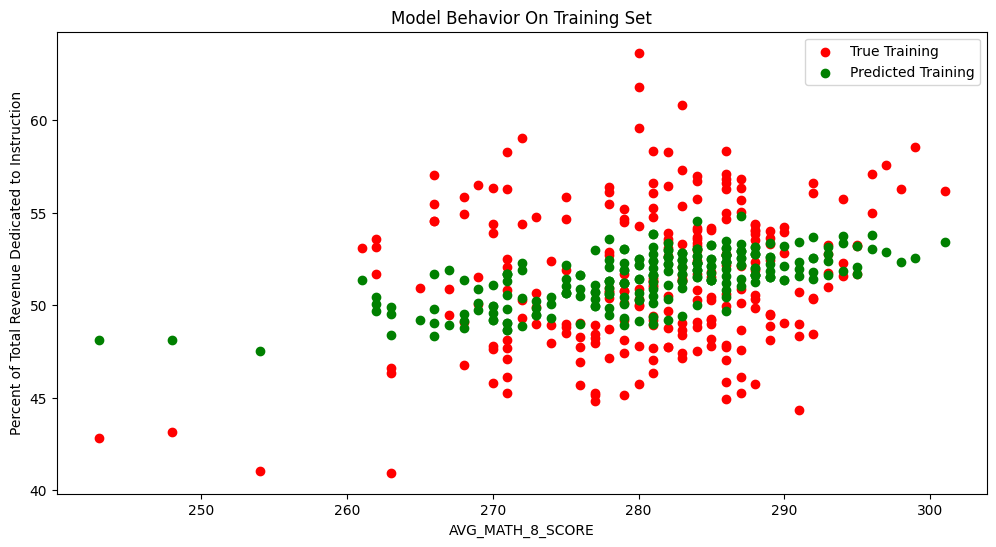

In [122]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Percent of Total Revenue Dedicated to Instruction')
plt.title("Model Behavior On Training Set")

NameError: name 'pltylabel' is not defined

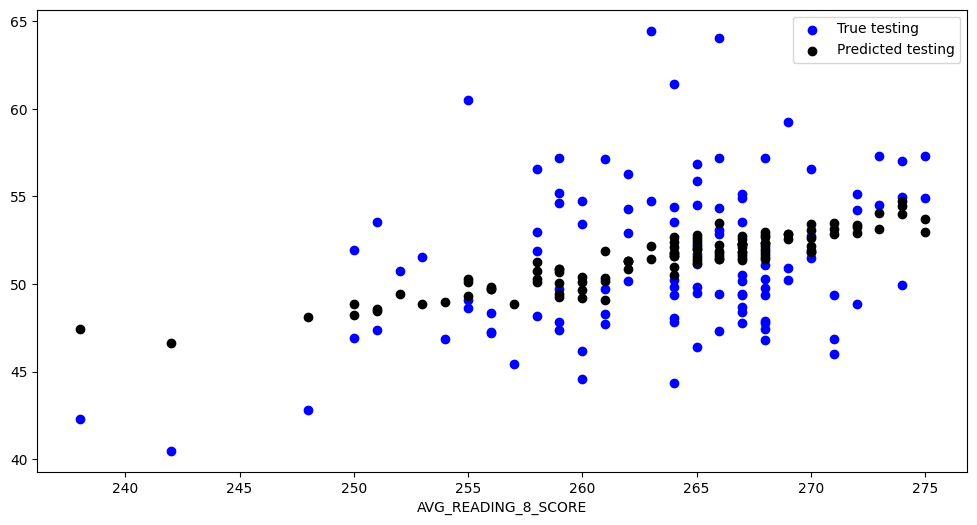

In [124]:
col_name = "AVG_READING_8_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
pltylabel('Percent of Total Revenue Dedicated to Instruction')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I set out to determine whether or not you could predict the percentage of funding a state provides to its educational programs based on the scores recieved in standardized 8th grade examinations in math and reading. I initially believed percentage of funding would be a good predictor to compare states and years since I assumed that more funding would correlate to higher test scores and vice versa. This belief was shattered upon cleaning the data and training a linear regression model on it. For all intents and purposes, the model would not be able to predict any deviation in funding for math scores. It manages to find a more distinct trend in reading scores, but in both cases, the predicted values are very far from the true values, and the r^2 for the model is extremely low. This implies that the performance of the model is rather poor. In the future, I could improve the performance by choosing a relationship between two variables which possessed a higher correlation. Even a machine can't see order in madness.